# Complete image preprocessing and feature extraction 

This file explores the techniques to be used for preprocessing and feature extraction for the Flavia leaves dataset images.

### Importing necessary libraries

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mahotas as mt
import pandas as pd
%matplotlib inline
%cd ./data2

C:\Users\habangal\Desktop\JHU\Computational statistics\Project\data2


In [2]:
def processFile(test_img_path):
    result = []
    
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    result.append(gs.shape[0]) #height
    result.append(gs.shape[1]) #width
    
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    _, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    result.append(len(contours)) #number of contours
    
    #print(test_img_path)
    #print(len(contours))
    if len(contours) > 1:
        cnt = contours[1]
    else:
        cnt = contours[0]
    result.append(len(cnt)) #number of edges
    
    plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
    M = cv2.moments(cnt)
    
    result.append(M["m00"])
    result.append(M["m10"])
    result.append(M["m01"])
    result.append(M["m20"])
    result.append(M["m11"])
    result.append(M["m02"])
    result.append(M["m30"])
    result.append(M["m21"])
    result.append(M["m12"])
    result.append(M["m03"])
    result.append(M["mu20"])
    result.append(M["mu11"])
    result.append(M["mu02"])
    result.append(M["mu30"])
    result.append(M["mu21"])
    result.append(M["mu12"])
    result.append(M["mu03"])
    result.append(M["nu20"])
    result.append(M["nu11"])
    result.append(M["nu02"])
    result.append(M["nu30"])
    result.append(M["nu21"])
    result.append(M["nu12"])
    result.append(M["nu03"])
    
    area = cv2.contourArea(cnt)
    result.append(area) #area
    
    perimeter = cv2.arcLength(cnt,True)
    result.append(perimeter) #perimeter
    
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
    ellipse = cv2.fitEllipse(cnt)
    im = cv2.ellipse(closing,ellipse,(255,255,255),2)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    result.append(aspect_ratio) #aspect_ratio
    
    rectangularity = w*h/area
    result.append(rectangularity) #rectangularity
        
    circularity = ((perimeter)**2)/area
    result.append(circularity) #circularity
    
    equi_diameter = np.sqrt(4*area/np.pi)
    result.append(equi_diameter) #equi_diameter
    
    (x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
    result.append(x)
    result.append(y)
    result.append(MA)
    result.append(ma)
    result.append(angle)
    
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    np.mean(blue_channel)
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0
    red_mean = np.mean(red_channel)
    result.append(red_mean)
    
    green_mean = np.mean(green_channel)
    result.append(green_mean)
    
    blue_mean = np.mean(blue_channel)
    result.append(blue_mean)
    
    red_var = np.std(red_channel)
    result.append(red_var)
    
    green_var = np.std(green_channel)
    result.append(green_var)
    
    blue_var = np.std(blue_channel)
    result.append(blue_var)
    
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    result.append(ht_mean[1])
    result.append(ht_mean[2])
    result.append(ht_mean[4])
    result.append(ht_mean[8])
        
    return result

In [3]:
files = [f for f in os.listdir('.')]
cols = ['height', 'width', 'NumContours', 'NumEdges',
        'm00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03',
       'area', 'perimeter', 'aspectRatio', 'rectangularity', 'circularity', 'equiDiameter', 'x', 'y', 'MA', 'ma', 'angle',
       'redMean', 'greenMean', 'blueMean', 'redVar', 'greenVar', 'blueVar', 'contrast', 'correlation', 'inverseDifferenceMoments', 'entropy']

lst = []
processed = 0
#print('Processed ' + processed + ' of ' + len(files))
for f in files:
    try:
        lst.append(processFile(f))
        processed = processed + 1
        print('Processed ' + str(processed) + ' of ' + str(len(files)))
    except:
        print('error processing ' + f)
    #print(f)
    
df1 = pd.DataFrame(lst, columns=cols)
df1.to_csv('../data.csv')
print('Done!')

Processed 1 of 87
Processed 2 of 87
Processed 3 of 87
Processed 4 of 87
Processed 5 of 87
Processed 6 of 87
Processed 7 of 87
Processed 8 of 87
Processed 9 of 87
Processed 10 of 87
Processed 11 of 87
Processed 12 of 87
Processed 13 of 87
Processed 14 of 87
Processed 15 of 87
Processed 16 of 87
Processed 17 of 87
Processed 18 of 87
Processed 19 of 87
Processed 20 of 87
Processed 21 of 87
Processed 22 of 87
Processed 23 of 87
Processed 24 of 87
Processed 25 of 87
Processed 26 of 87
Processed 27 of 87
Processed 28 of 87
Processed 29 of 87
Processed 30 of 87
Processed 31 of 87
Processed 32 of 87
Processed 33 of 87
Processed 34 of 87
Processed 35 of 87
Processed 36 of 87
Processed 37 of 87
Processed 38 of 87
Processed 39 of 87
Processed 40 of 87
Processed 41 of 87
Processed 42 of 87
Processed 43 of 87
Processed 44 of 87
Processed 45 of 87
Processed 46 of 87
Processed 47 of 87
Processed 48 of 87
Processed 49 of 87
Processed 50 of 87
Processed 51 of 87
Processed 52 of 87
Processed 53 of 87
Pr

### Reading he image

In [2]:
test_img_path = "20150410_153308_Richtone.jpg"
test_img_path

'20150410_153308_Richtone.jpg'

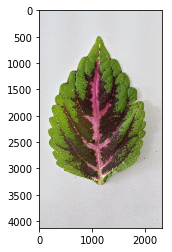

In [3]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Converting image to grayscale

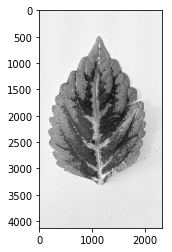

In [4]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [6]:
gs.shape

(4128, 2322)

### Smoothing image using Guassian filter of size (25,25)

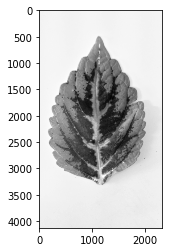

In [7]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

### Adaptive image thresholding using Otsu's thresholding method

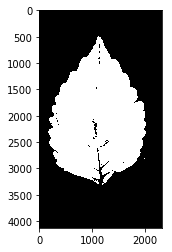

In [8]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

### Closing of holes using Morphological Transformation

Performed so as to close any holes present in the leaf

In [9]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

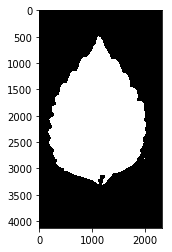

In [10]:
plt.imshow(closing,cmap='Greys_r')

# Boundary extraction

Boundary extraction is needed which will be used in calculation of shape features.

In [11]:
_, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [12]:
len(contours)

2

In [14]:
cnt = contours[1]
len(cnt)

3457

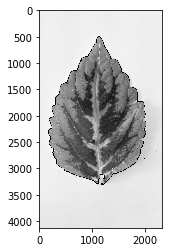

In [15]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

## 1. Shape based features

### Calculating moments using contours

In [16]:
M = cv2.moments(cnt)
M

{'m00': 3351694.0,
 'm10': 3693604269.6666665,
 'm01': 6931340416.0,
 'm20': 4726880063049.333,
 'm11': 7603530253729.583,
 'm02': 15610736923842.332,
 'm30': 6656125794967279.0,
 'm21': 9764645844743760.0,
 'm12': 1.7054542712154158e+16,
 'm03': 3.740257832446655e+16,
 'mu20': 656486852660.8457,
 'mu11': -34884397205.35742,
 'mu02': 1276647963908.918,
 'mu30': 139399127586.0,
 'mu21': 66291369164080.25,
 'mu12': -4381309571139.25,
 'mu03': -160843342983960.0,
 'nu20': 0.05843826441086105,
 'nu11': -0.0031052923899960454,
 'nu02': 0.1136429327900634,
 'nu30': 6.777962332027434e-06,
 'nu21': 0.0032232655319557866,
 'nu12': -0.00021303111254991486,
 'nu03': -0.007820638041153271}

In [17]:
area = cv2.contourArea(cnt)
area

3351694.0

In [18]:
perimeter = cv2.arcLength(cnt,True)
perimeter

8681.95014822483

### Fitting in the best-fit rectangle and ellipse

The best-fit rectangle is chosen and not ellipse as removes (leaves out) some portion at the extreme ends of the leaf image.

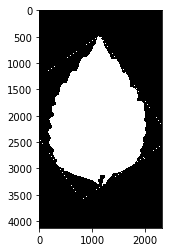

In [19]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

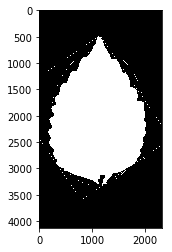

In [20]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

### Shape based features calculated - Aspect ratio, rectangularity, circularity etc.

In [21]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

0.6582413670345318

In [22]:
rectangularity = w*h/area
rectangularity

1.5496167012859765

In [23]:
circularity = ((perimeter)**2)/area
circularity

22.48900358334059

In [24]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

2065.795087285178

In [25]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
(x,y),(MA,ma),angle

((1104.9395751953125, 2044.3131103515625),
 (1765.99609375, 2553.3876953125),
 3.1913139820098877)

## 2. Color based features

### Calculating color based features - mean, std-dev of the RGB channels

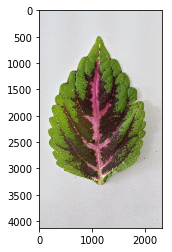

In [26]:
plt.imshow(img,cmap="Greys_r")

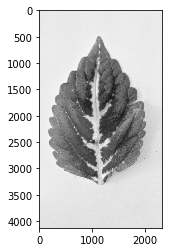

In [27]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

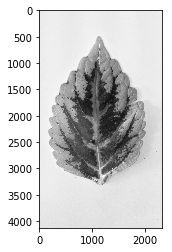

In [28]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

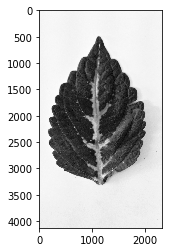

In [29]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [30]:
np.mean(blue_channel)

155.85175920918215

In [31]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [32]:
red_mean = np.mean(red_channel)
red_mean

172.96332539611

In [33]:
green_mean = np.mean(green_channel)
green_mean

171.33054633301953

In [34]:
blue_mean = np.mean(blue_channel)
blue_mean

155.85175920918215

In [35]:
red_var = np.std(red_channel)
red_var

58.48779526441026

## 3. Texture based features 

### Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [36]:
import mahotas as mt

In [37]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 5.05427642e-03,  4.06012484e+01,  9.95090561e-01,  4.13494027e+03,
        5.05280014e-01,  3.37032953e+02,  1.64991598e+04,  7.60640343e+00,
        9.58212255e+00,  9.42695205e-04,  2.50778832e+00, -5.54458488e-01,
        9.99661327e-01])

In [38]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

40.6012483978361
0.9950905610527998
0.5052800138374007
9.582122551370416
